In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

# Gene information

In [2]:
gene_978 = pd.read_csv('../../processed_data/l1000_gene_info_978.csv', index_col=0)
gene_978.head()

,gene_idx,gene_name_match,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space,gene_node_idx,corrected_gene_name,GO_Pathway,KEGG_Cellular_Process,KEGG_Metabolism,KEGG_Genetic_Information_Processing,KEGG_Environmental_Information_Processing,Cellular Process(KEGG),Metabolism(KEGG),Genetic Information Processing(KEGG),Environmental Information Processing(KEGG)
gene_name,,,,,,,,,,,,,,,,,,,,
DDR1,0,DDR1,780,DDR1,ENSG00000204580,discoidin domain receptor tyrosine kinase 1,protein-coding,NCBI,landmark,4129,DDR1,reproduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAX8,1,PAX8,7849,PAX8,ENSG00000125618,paired box 8,protein-coding,NCBI,landmark,11858,PAX8,metabolic process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RPS5,2,RPS5,6193,RPS5,ENSG00000083845,ribosomal protein S5,protein-coding,NCBI,landmark,14176,RPS5,metabolic process,NaN,NaN,Genetic Information Processing,NaN,NaN,NaN,Genetic Information Processing,NaN
ABCF1,3,ABCF1,23,ABCF1,ENSG00000204574,ATP binding cassette subfamily F member 1,protein-coding,NCBI,landmark,68,ABCF1,metabolic process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPAG7,4,SPAG7,9552,SPAG7,ENSG00000091640,sperm associated antigen 7,protein-coding,NCBI,landmark,15672,SPAG7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# KEGG_pathway 

In [3]:
kegg = pd.read_csv('KEGG_pathway_ko_uniq_ensg.csv')

In [4]:
kegg.level1_pathway_id.value_counts()

level1_pathway_id
Brite Hierarchies                       18440
Human Diseases                          13434
Organismal Systems                       8187
Environmental Information Processing     4936
Cellular Processes                       3314
Metabolism                               3015
Genetic Information Processing           1890
Not Included in Pathway or Brite          759
Name: count, dtype: int64

In [5]:
match_genes = np.intersect1d(gene_978.corrected_gene_name.values, kegg.ko.values)
match_genes.shape

(907,)

In [6]:
kegg_filter = kegg[kegg.ko.isin(match_genes)]
kegg_filter.level1_pathway_id.value_counts()

level1_pathway_id
Human Diseases                          2251
Brite Hierarchies                       1111
Organismal Systems                      1014
Environmental Information Processing     637
Cellular Processes                       508
Metabolism                               233
Genetic Information Processing           201
Not Included in Pathway or Brite          27
Name: count, dtype: int64

In [7]:
kegg_filter = kegg[kegg.ko.isin(match_genes)]
kegg_filter = kegg_filter[kegg_filter.level1_pathway_id == 'Cellular Processes']
kegg_filter.drop_duplicates(inplace=True, keep='first')
gene2kegg_cp= {k:v for k,v in zip(kegg_filter.ko, kegg_filter.level1_pathway_id)}
gene_978['Cellular Process(KEGG)'] = gene_978.corrected_gene_name.map(gene2kegg_cp)

In [8]:
kegg_filter = kegg[kegg.ko.isin(match_genes)]
kegg_filter = kegg_filter[kegg_filter.level1_pathway_id == 'Metabolism']
kegg_filter.drop_duplicates(inplace=True, keep='first')
gene2kegg_cp= {k:v for k,v in zip(kegg_filter.ko, kegg_filter.level1_pathway_id)}
gene_978['Metabolism(KEGG)'] = gene_978.corrected_gene_name.map(gene2kegg_cp)

In [9]:
kegg_filter = kegg[kegg.ko.isin(match_genes)]
kegg_filter = kegg_filter[kegg_filter.level1_pathway_id == 'Genetic Information Processing']
kegg_filter.drop_duplicates(inplace=True, keep='first')
gene2kegg_cp= {k:v for k,v in zip(kegg_filter.ko, kegg_filter.level1_pathway_id)}
gene_978['Genetic Information Processing(KEGG)'] = gene_978.corrected_gene_name.map(gene2kegg_cp)

In [10]:
kegg_filter = kegg[kegg.ko.isin(match_genes)]
kegg_filter = kegg_filter[kegg_filter.level1_pathway_id == 'Environmental Information Processing']
kegg_filter.drop_duplicates(inplace=True, keep='first')
gene2kegg_cp= {k:v for k,v in zip(kegg_filter.ko, kegg_filter.level1_pathway_id)}
gene_978['Environmental Information Processing(KEGG)'] = gene_978.corrected_gene_name.map(gene2kegg_cp)

In [11]:
gene_978.head()

,gene_idx,gene_name_match,gene_id,gene_symbol,ensembl_id,gene_title,gene_type,src,feature_space,gene_node_idx,corrected_gene_name,GO_Pathway,KEGG_Cellular_Process,KEGG_Metabolism,KEGG_Genetic_Information_Processing,KEGG_Environmental_Information_Processing,Cellular Process(KEGG),Metabolism(KEGG),Genetic Information Processing(KEGG),Environmental Information Processing(KEGG)
gene_name,,,,,,,,,,,,,,,,,,,,
DDR1,0,DDR1,780,DDR1,ENSG00000204580,discoidin domain receptor tyrosine kinase 1,protein-coding,NCBI,landmark,4129,DDR1,reproduction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAX8,1,PAX8,7849,PAX8,ENSG00000125618,paired box 8,protein-coding,NCBI,landmark,11858,PAX8,metabolic process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RPS5,2,RPS5,6193,RPS5,ENSG00000083845,ribosomal protein S5,protein-coding,NCBI,landmark,14176,RPS5,metabolic process,NaN,NaN,Genetic Information Processing,NaN,NaN,NaN,Genetic Information Processing,NaN
ABCF1,3,ABCF1,23,ABCF1,ENSG00000204574,ATP binding cassette subfamily F member 1,protein-coding,NCBI,landmark,68,ABCF1,metabolic process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SPAG7,4,SPAG7,9552,SPAG7,ENSG00000091640,sperm associated antigen 7,protein-coding,NCBI,landmark,15672,SPAG7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# UMAP Plot of gene embedding

In [14]:
ppi_vector = np.load('/root/data1/GY/gy/XPert/processed_data/PPI_gene_vector_128d.npy')
ppi_vector.shape

(978, 128)

In [15]:
palette = {
    'Other': '#E9E9E9',
    'Cellular Processes': '#7DA8EE',
    'Metabolism': '#9c9ede',
    'Genetic Information Processing': '#ECC50F',
    'Environmental Information Processing': '#bcbd22',
}

In [16]:
plot_adata = sc.AnnData(X=ppi_vector, obs=gene_978)
plot_adata

AnnData object with n_obs × n_vars = 978 × 128
    obs: 'gene_idx', 'gene_name_match', 'gene_id', 'gene_symbol', 'ensembl_id', 'gene_title', 'gene_type', 'src', 'feature_space', 'gene_node_idx', 'corrected_gene_name', 'GO_Pathway', 'KEGG_Cellular_Process', 'KEGG_Metabolism', 'KEGG_Genetic_Information_Processing', 'KEGG_Environmental_Information_Processing', 'Cellular Process(KEGG)', 'Metabolism(KEGG)', 'Genetic Information Processing(KEGG)', 'Environmental Information Processing(KEGG)'

/root/data1/GY/Mambaforge/envs/openbiomed/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/root/data1/GY/Mambaforge/envs/openbiomed/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/data1/GY/Mambaforge/envs/openbiomed/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.

[<Axes: title={'center': 'Cellular Process(KEGG)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'Metabolism(KEGG)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'Genetic Information Processing(KEGG)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'Environmental Information Processing(KEGG)'}, xlabel='UMAP1', ylabel='UMAP2'>]

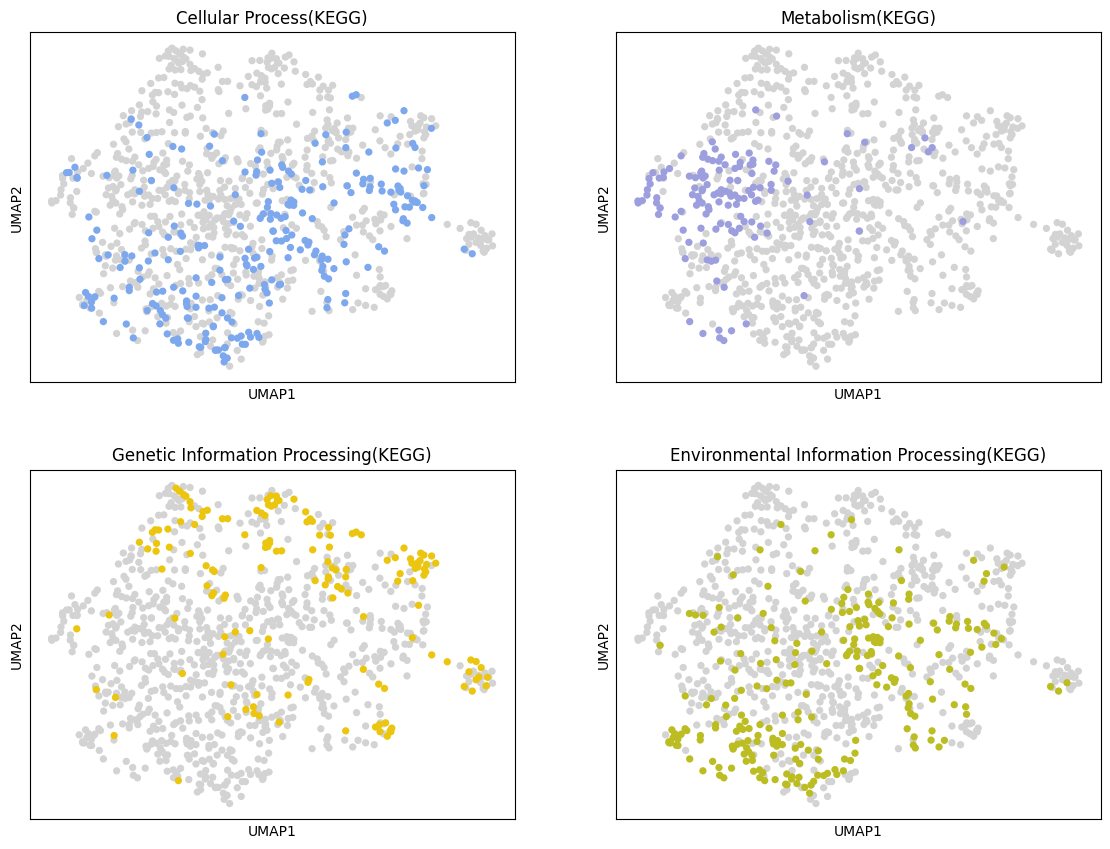

In [19]:
sc.tl.pca(plot_adata)
sc.pp.neighbors(plot_adata, n_neighbors=30)
sc.tl.umap(plot_adata)
sc.pl.umap(plot_adata, color=['Cellular Process(KEGG)', 'Metabolism(KEGG)', 'Genetic Information Processing(KEGG)', 'Environmental Information Processing(KEGG)'],
           frameon=True, legend_fontsize=10, legend_fontoutline=2, 
           palette = palette, size=110, 
           ncols=2, wspace=0.1, hspace=0.25, na_in_legend=False, legend_loc='none',
           show=False,
           )

# plt.savefig("figs/KEGG_gene_embed_plot.svg", format="svg", dpi=300)